In [1]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.0.21 🚀 Python-3.10.9 torch-1.13.1 CPU
Setup complete ✅ (8 CPUs, 16.0 GB RAM, 166.6/460.4 GB disk)


In [3]:
# set the path way
import os 
HOME = os.getcwd()
print(HOME)

/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8


### 1. Load the Libraries 

In [4]:
from ultralytics import YOLO 
from  IPython.display  import display, Image, clear_output  # to display images
from roboflow import Roboflow
from dotenv import load_dotenv

load_dotenv()

True

In [19]:
# Set your Roboflow API key
ROBOFLOW_API_KEY=os.getenv("API_KEY")
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

### 2. Download Labeled Images from Roboflow

In [20]:
!mkdir {HOME}/datasets 
%cd {HOME}/datasets

# Set your Roboflow workspace ID
project = rf.workspace("adebayo-akinlalu-58jxx").project("fruit-model-uaxo9")
dataset = project.version(1).download("yolov8")

/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to fruit-model-1 in yolov8:: 100%|██████████| 400/400 [00:00<00:00, 10859.81it/s]


### 3. Training Custom Weight using CLI
- **imgsz:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 100+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **model:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.


In [29]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks
100%|██████████████████████████████████████| 21.5M/21.5M [00:06<00:00, 3.54MB/s]

Ultralytics YOLOv8.0.11 🚀 Python-3.10.9 torch-1.13.1 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks/datasets/fruit-model-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=Fals

### 4. Performance Matrics

/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8


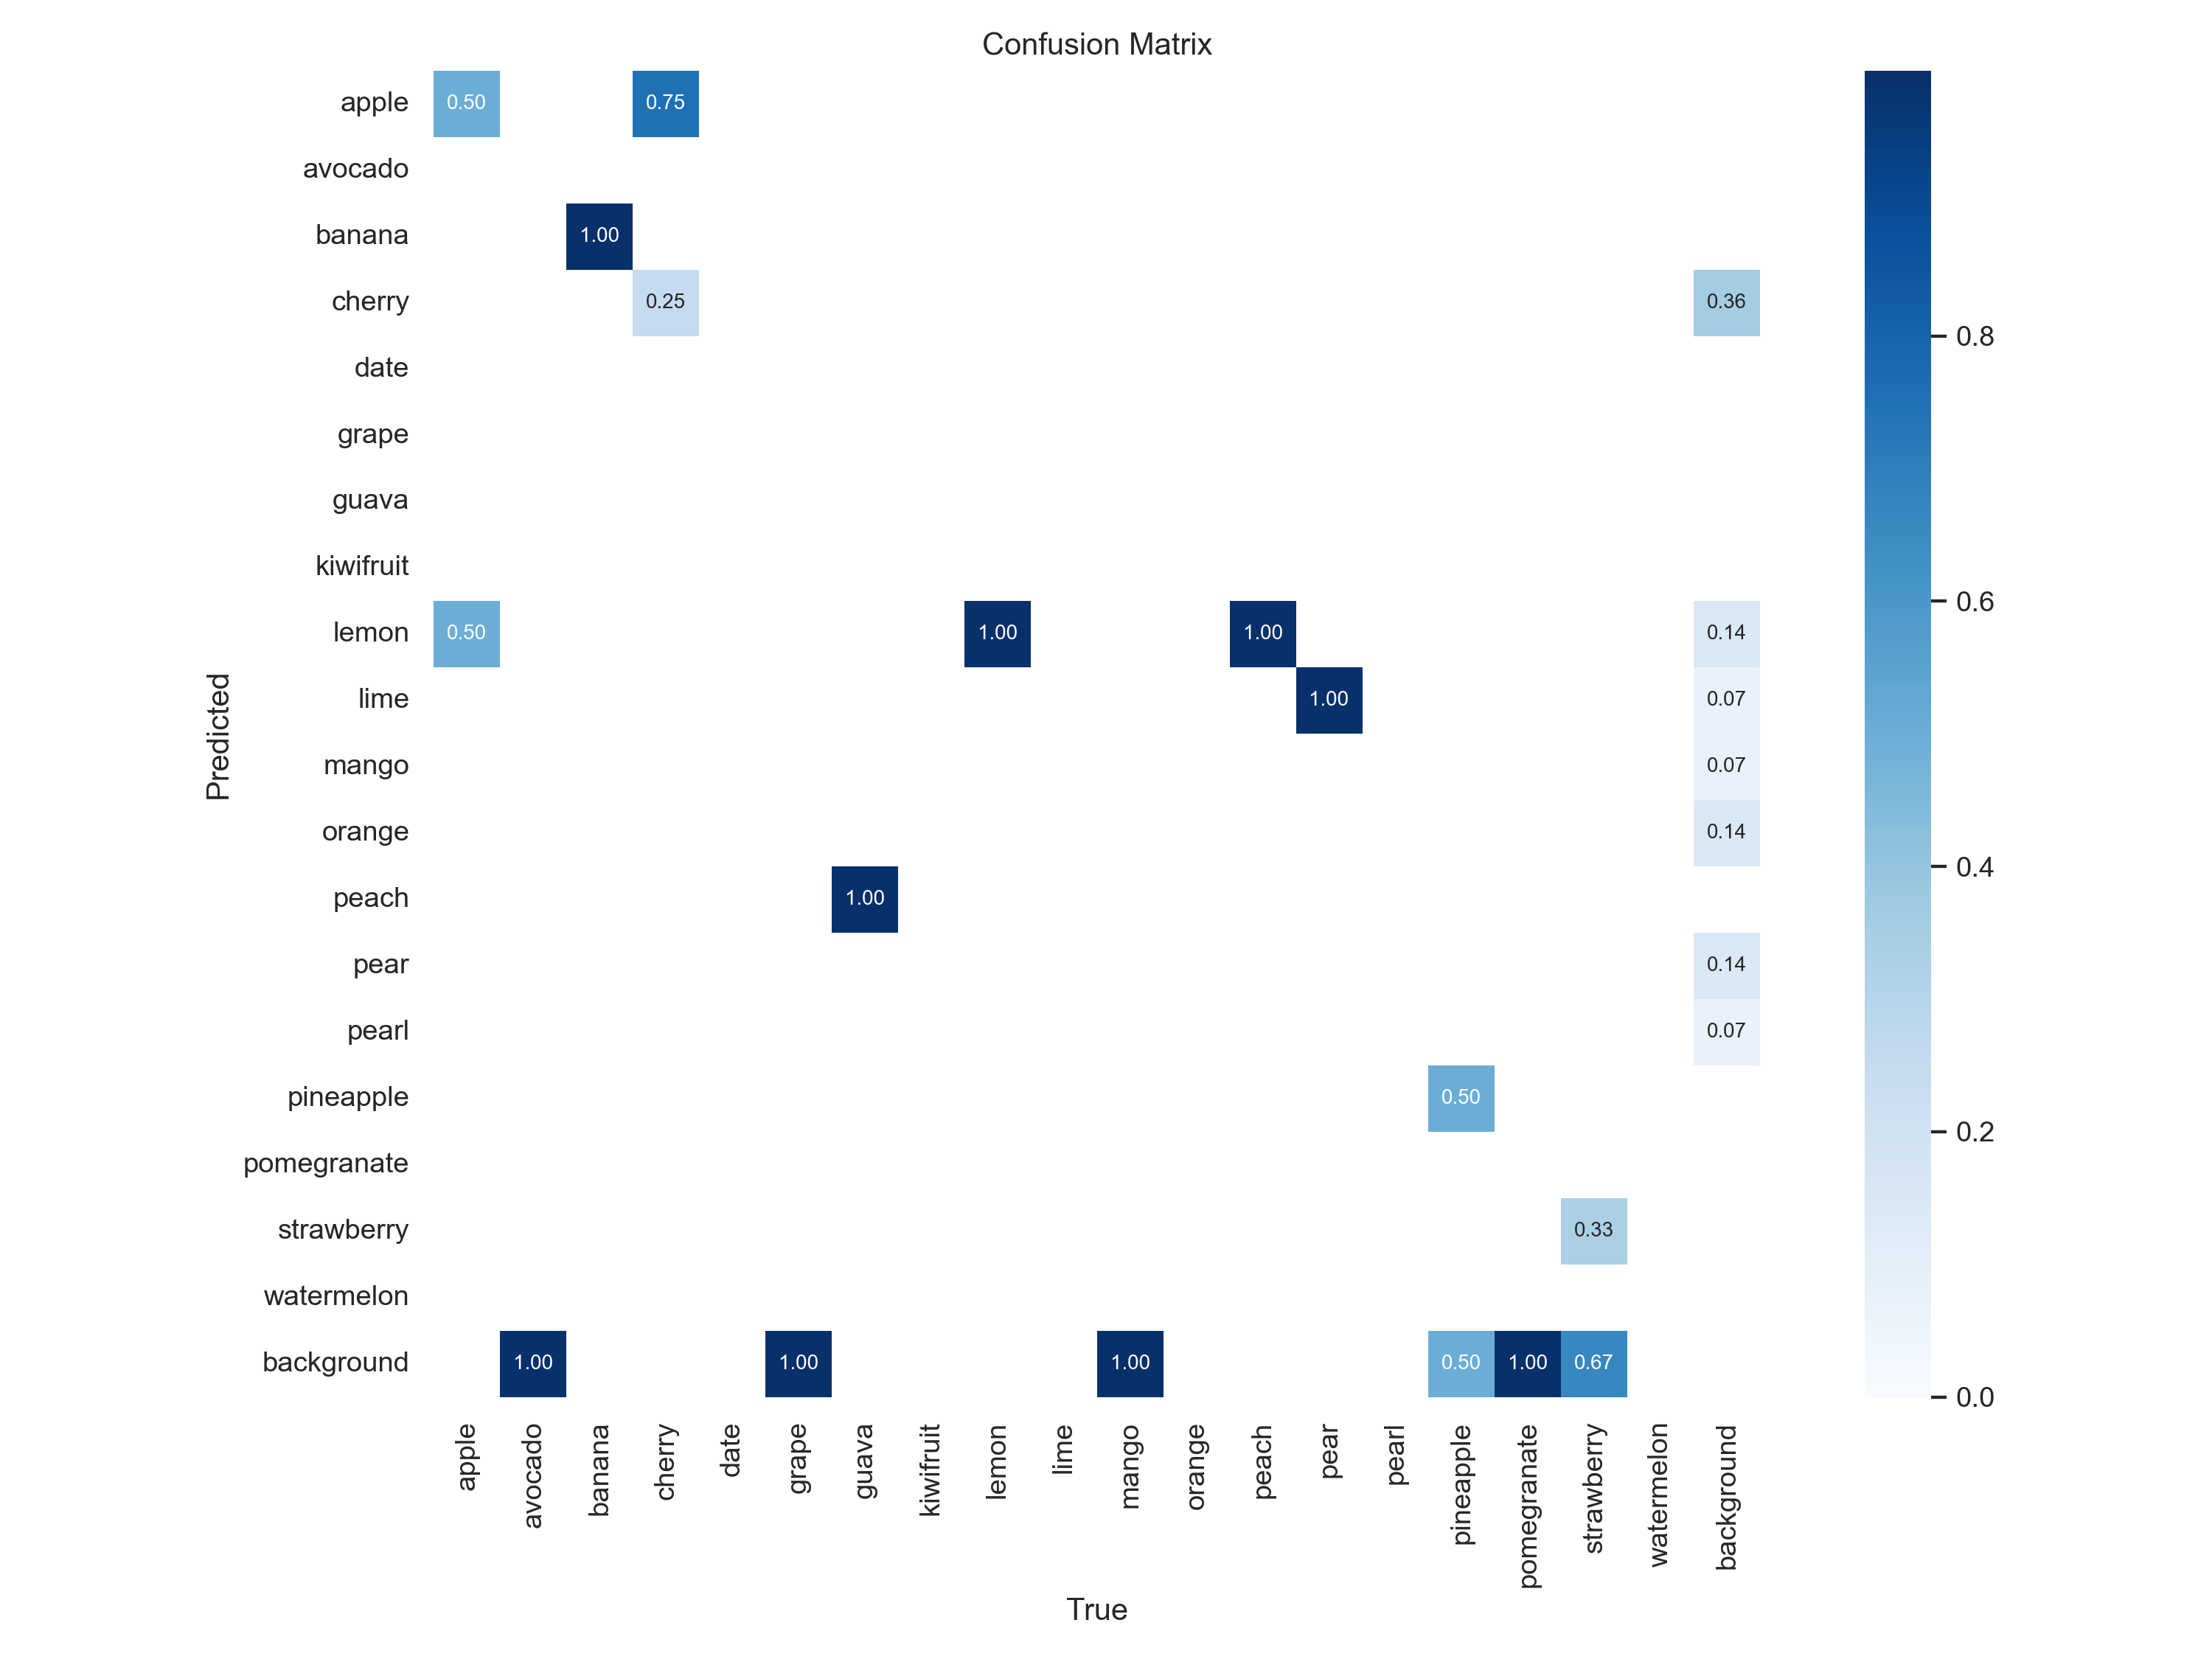

In [5]:
%cd {HOME}
Image(filename='runs/detect/train2/confusion_matrix.png', width=1000)

/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8


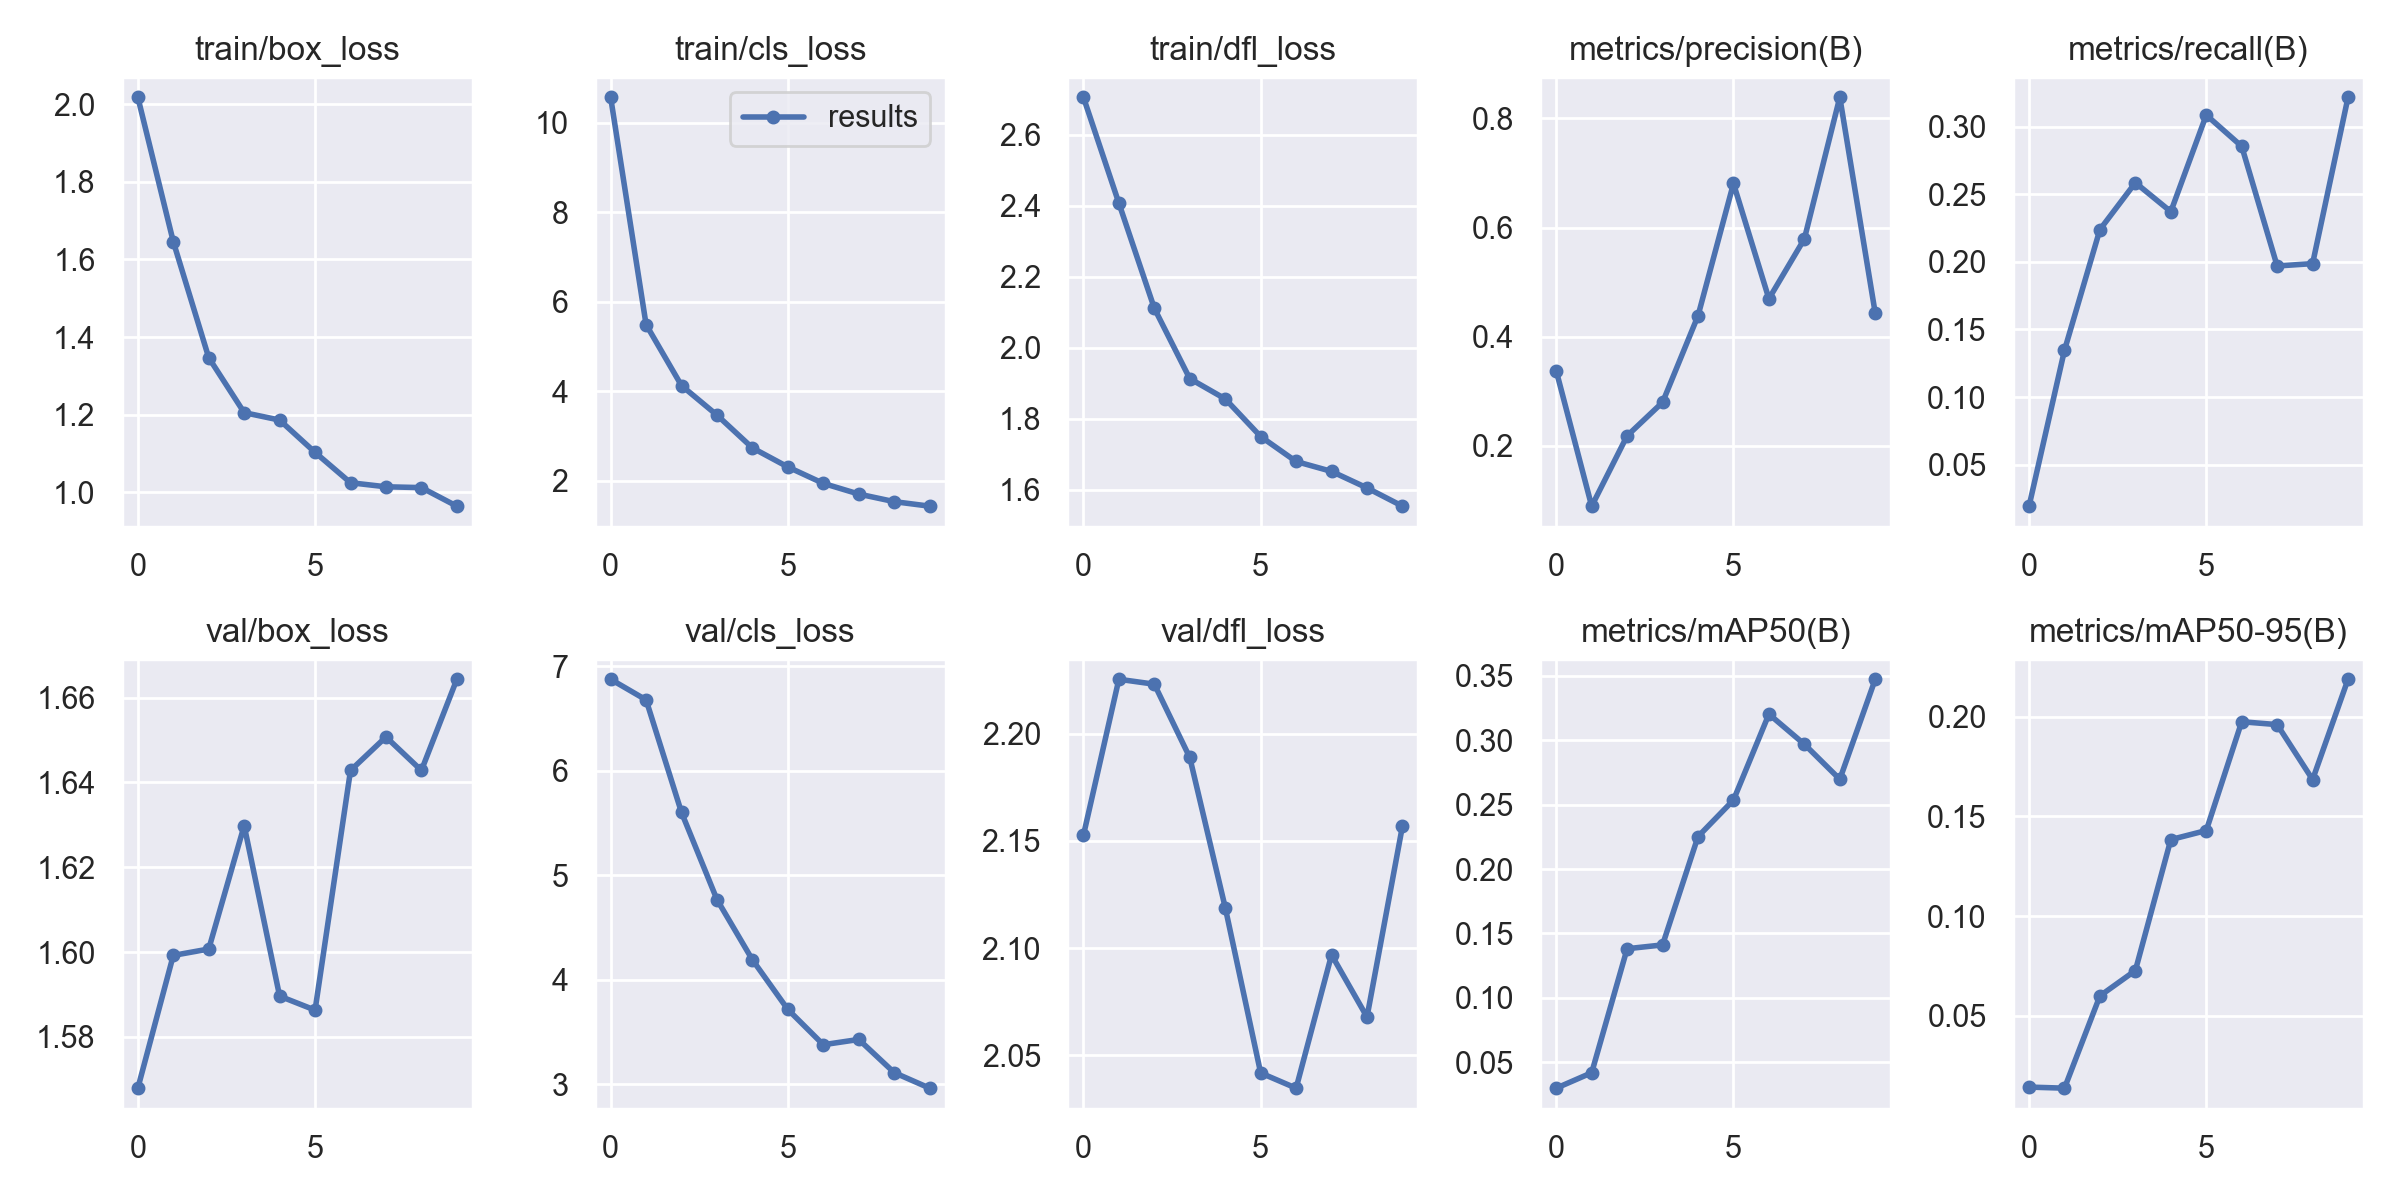

In [6]:
%cd {HOME}
Image(filename='runs/detect/train2/results.png', width=1000)

/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8


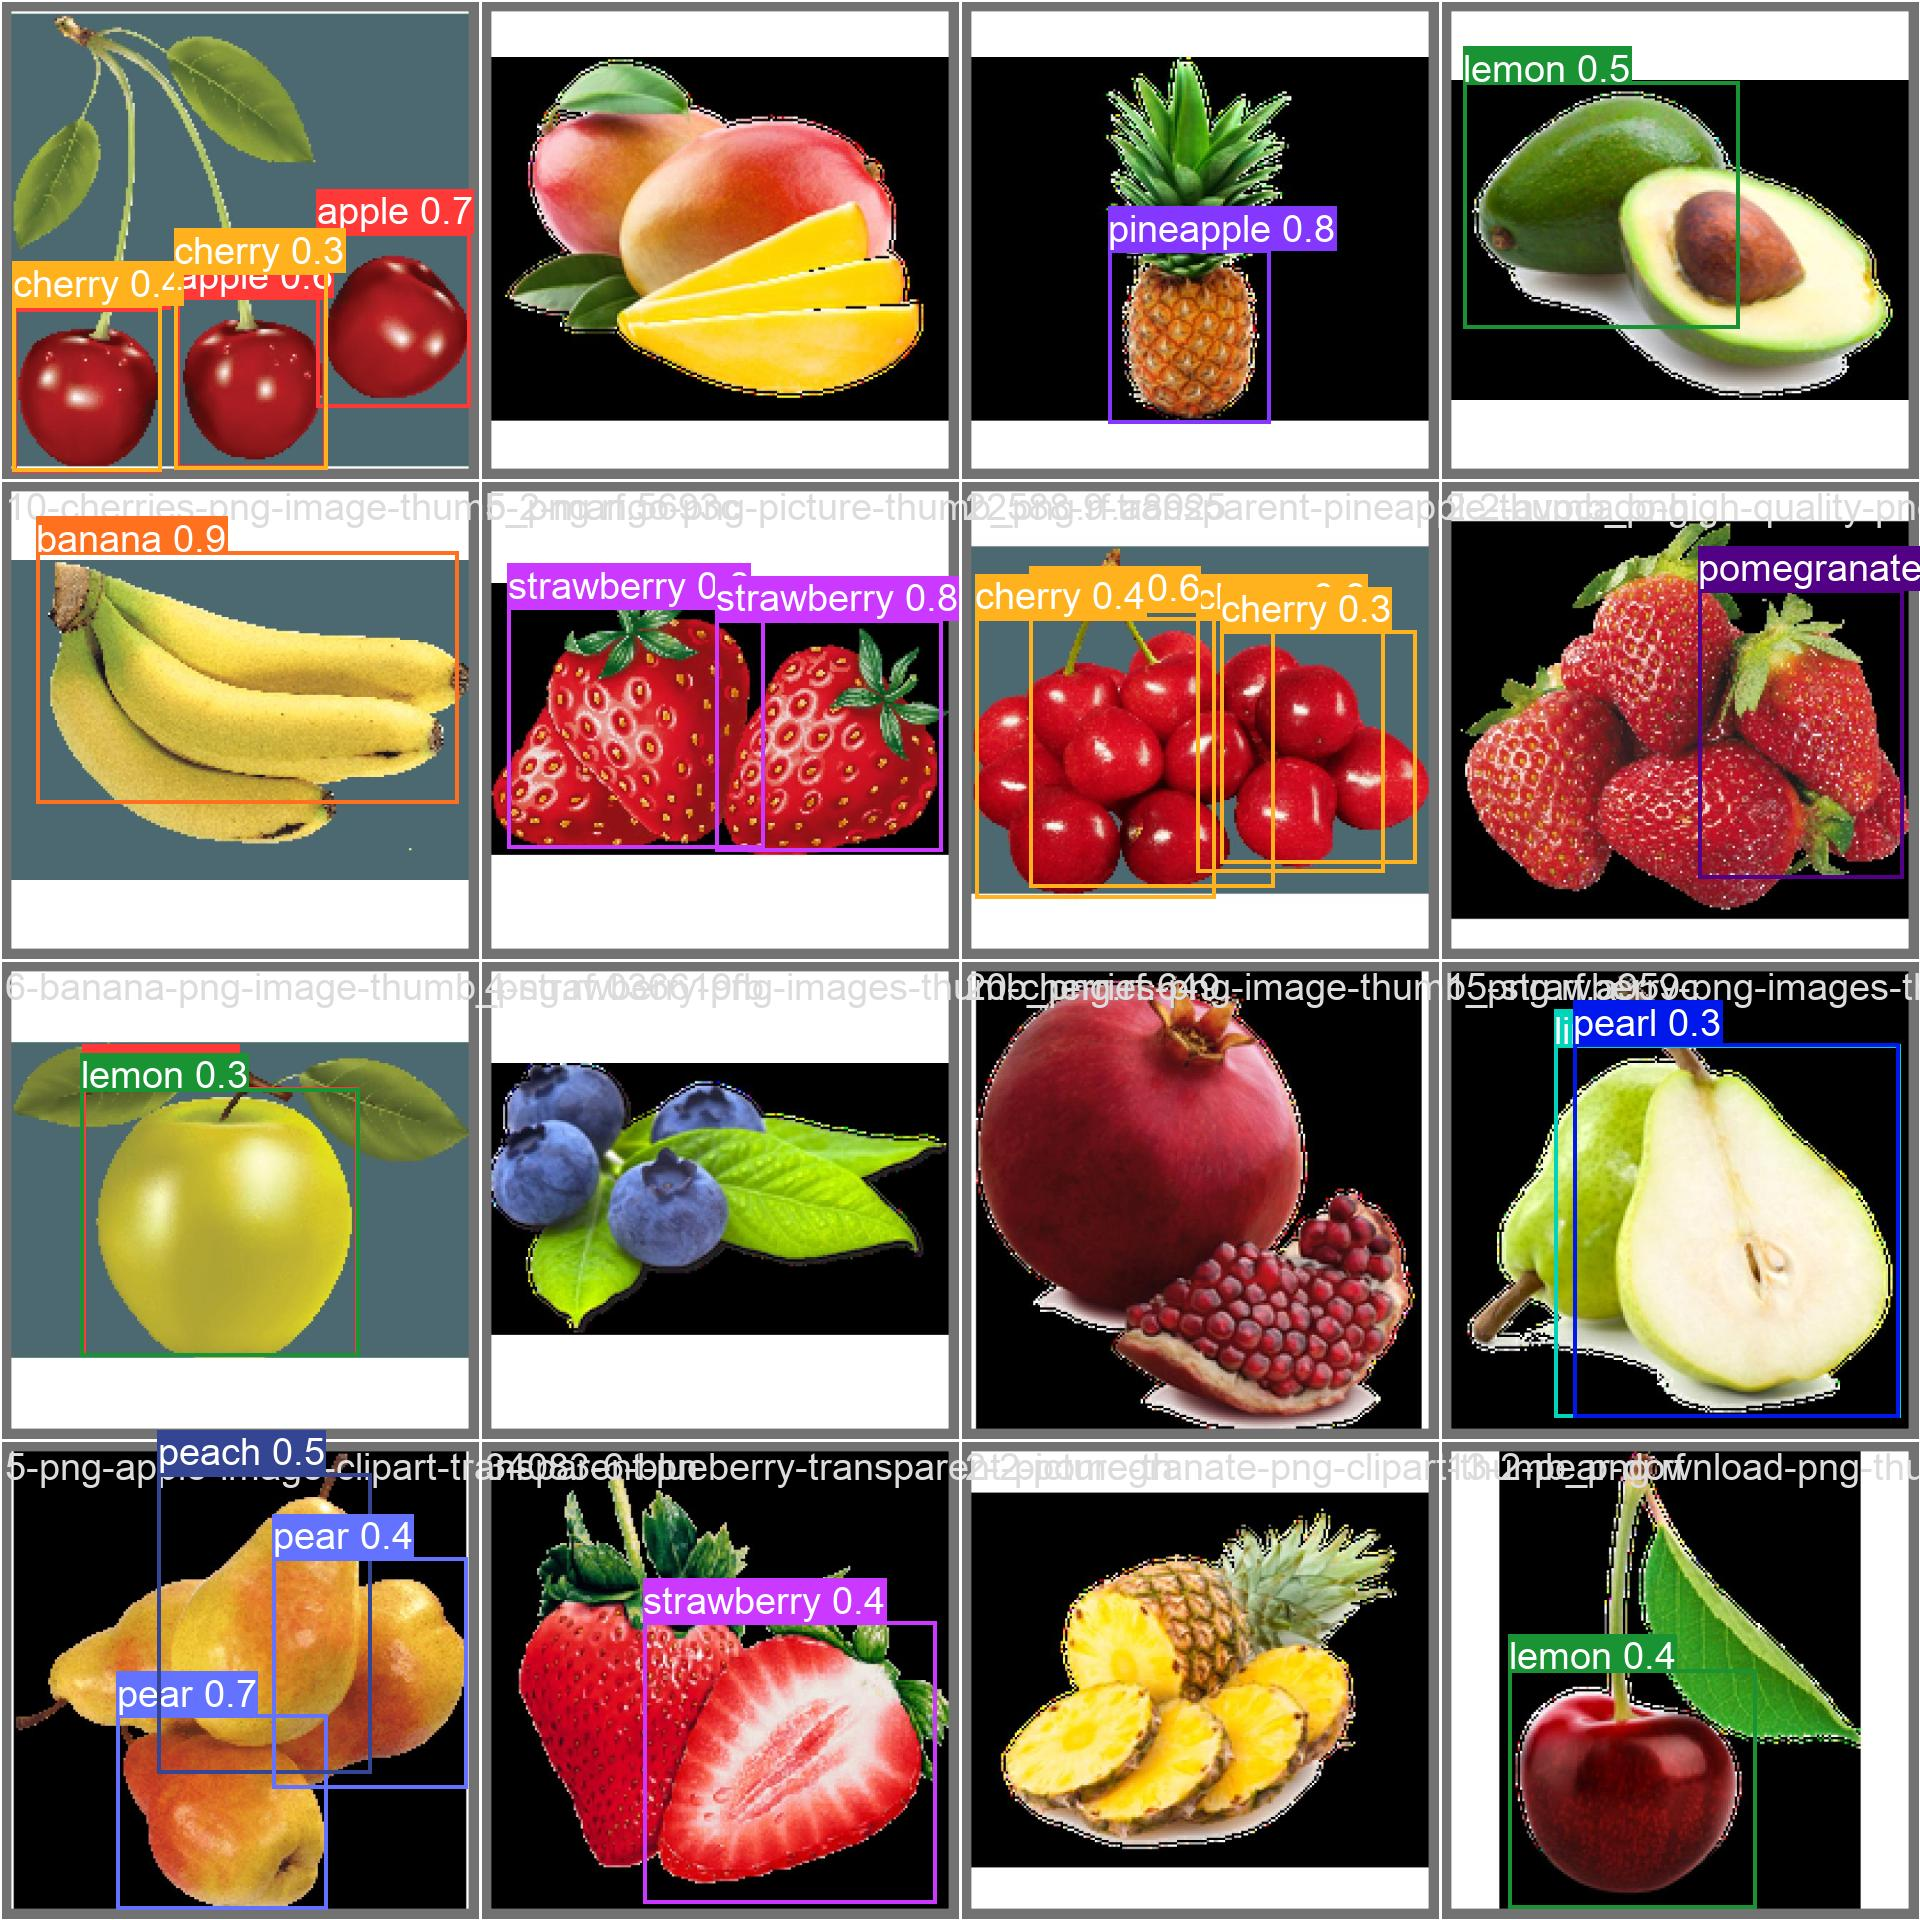

In [7]:
%cd {HOME}
Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=1000)

#### 4.1 Evaluate custom YOLOv8 detector performance using CLI

* The key metric to focus on is `mAP>=0.5`  

* Average precision computes the average precision value for recall value over 0 to 1.  

* In some context, we compute the AP for each class and average them

In [35]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks
Ultralytics YOLOv8.0.11 🚀 Python-3.10.9 torch-1.13.1 CPU
Fusing... 
Model summary: 168 layers, 11132937 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks/data
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         18         25      0.442      0.322      0.347      0.219
                 apple         18          2      0.204        0.5      0.359      0.268
               avocado         18          1          1          0      0.497      0.448
                banana         18          1      0.519          1      0.995      0.697
                cherry         18          4      0.547       0.75      0.591      0.245
                 grape         18          2          1          0      0.093     0.0388
                 guava         18          1          1          0          0          0
            

### 5. Inference with custom Weights using CLI

In [36]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images

/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks
Ultralytics YOLOv8.0.11 🚀 Python-3.10.9 torch-1.13.1 CPU
Fusing... 
Model summary: 168 layers, 11132937 parameters, 0 gradients, 28.5 GFLOPs
image 1/8 /Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks/datasets/fruit-model-1/test/images/10-pineapple-png-image-download-thumb-1-_png.rf.1c17ee406a593b431701a1cf347840a9.jpg: 640x640 1 pineapple, 128.7ms
image 2/8 /Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks/datasets/fruit-model-1/test/images/17-red-cherry-png-image-download-thumb_png.rf.8972b6ab0ba9664bcc142a05f34a5fc6.jpg: 640x640 133.9ms
image 3/8 /Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks/datasets/fruit-model-1/test/images/19-orange-png-image-download-thumb_png.rf.d49a4da0e2b8eb1f08327e8cff465ae6.jpg: 640x640 2 oranges, 124.2ms
image 4/8 /Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks/datasets/fruit-model-1/test/images/2-2-apricot-free-download-png-thumb_png.rf.fa4b

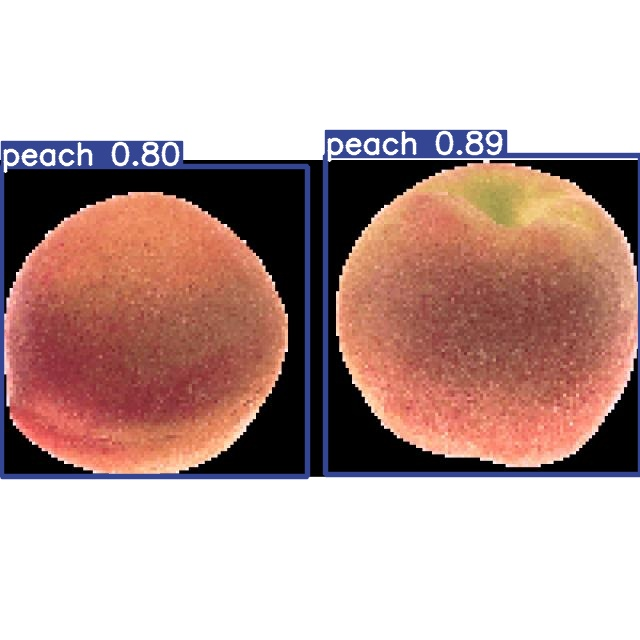

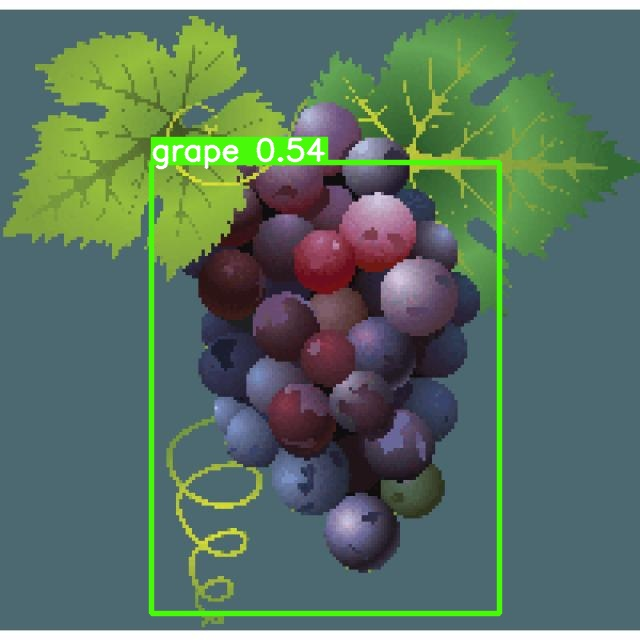

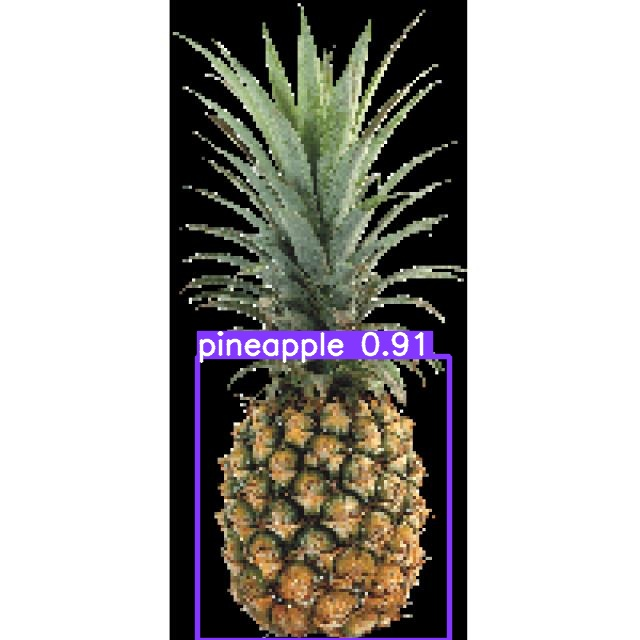

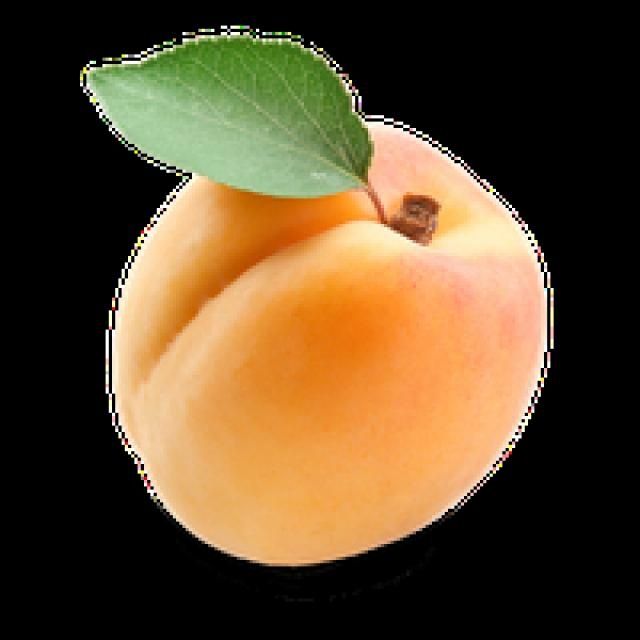

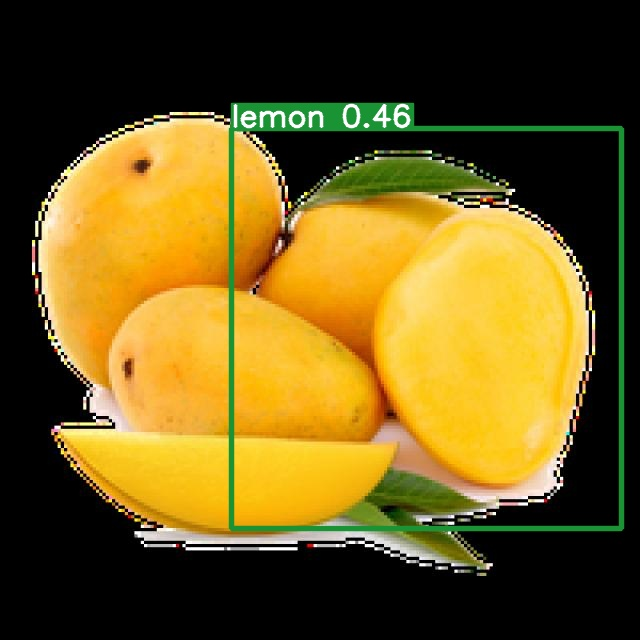

In [38]:
import glob

for image in glob.glob(f"{HOME}/runs/detect/predict2/*.jpg")[:5]:
    display(Image(filename=image, width=600))
    print("\n")

### Export CLI

In [5]:
%cd {HOME}

# !yolo task=detect mode=export model={HOME}/runs/detect/train2/weights/best.pt format=tfjs  

/Users/adebayoakinlaluclearxp/object-classifier-tng/notebooks-yolov8
